# SYDE556/750 Assignment 4: Nengo and Dynamics

- Due Date: March 20th (midnight)
- Total marks: 10 (10% of final grade)
- Late penalty: 1 mark per day
- For this assignment, you must use Nengo, which can be downloaded from http://nengo.ai.
    - Feel free to look through the examples folder before doing this assignment.
- You can also use Nengo GUI if you'd like, see the nengo.ai website as well.

## 1) Building an ensemble of neurons

Make a new model and inside that model make an ensemble of neurons.  It should have 100 neurons, and represent a 1-dimensional space.  The intercepts should be between -1 and 1, and the maximum firing rates should be between 100Hz and 200Hz.  $\tau_{RC}$ should be 0.02s and $\tau_{ref}$ should be 0.002s.

Note: You don't need to run the model over time for this question.

1. [1 mark] Plot the tuning curves. Plot the representation accuracy plot ( 𝑥  and  𝑥̂   on the same plot). Compute and report the RMSE.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import nengo

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE : 0.004377459149693678



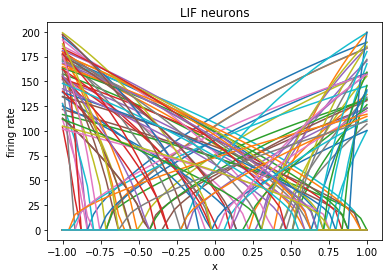

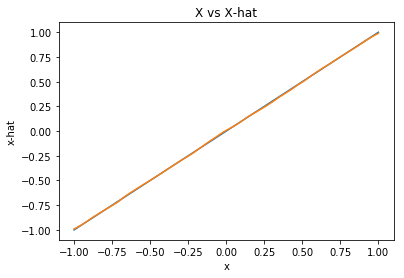

In [2]:
from nengo.dists import Uniform

model = nengo.Network(label='Neurons using Nengo')

with model:
    neurons = nengo.Ensemble(100, dimensions=1,max_rates=Uniform(100,200), 
                             neuron_type = nengo.LIFRate(tau_rc=0.02, tau_ref=0.002))
    connection = nengo.Connection(neurons, neurons)

simulator = nengo.Simulator(model)
x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)

plt.figure()
plt.plot(x, A)
plt.title('LIF neurons')
plt.xlabel('x')
plt.ylabel('firing rate')

decoders = simulator.data[connection].weights.T
xhat = np.dot(A, decoders)

plt.figure()
plt.title("X vs X-hat")
plt.plot(x, x)
plt.plot(x, xhat)
plt.xlabel('x')
plt.ylabel('x-hat')

print('\nRMSE :',np.sqrt(np.average((x-xhat)**2)))
print("")

2. [1 mark] What happens to the RMSE as the radius increases? Why? Provide four example points (i.e., RMSE at various radiuses). (Note: Nengo will automatically rescale the intercepts as the radius increases.)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE with radius : [1, 2, 3, 4, 5]  are  [0.0038046498828808533, 0.007971534655419905, 0.01160717783364193, 0.014367929385688507, 0.019182804651337308]  respectively.


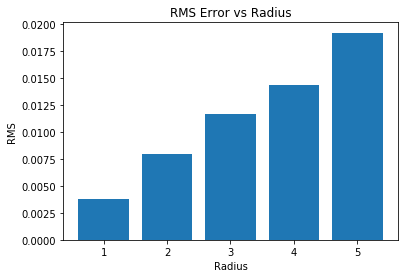

In [3]:
radius = [1,2,3,4,5]
rms_errors = []
np.random.seed(3)
for r in radius:
    neurons.radius = r
    simulator = nengo.Simulator(model)
    x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)
    decoders = simulator.data[connection].weights.T
    xhat = np.dot(A, decoders)
    rms_errors.append(np.sqrt(np.average((x-xhat)**2)))

print('\nRMSE with radius :',radius,' are ',rms_errors, ' respectively.')

plt.bar(radius,rms_errors, tick_label=radius)
plt.title("RMS Error vs Radius")
plt.xlabel("Radius")
plt.ylabel("RMS")
plt.show();

# neurons.radius = 1

### Comment

As the radius increases the RMSE increases. This is due to same neuron population is being used in wider radius. We need more neurons to make the system more efficient for larger radius. Neurons population should be increased according to the wider radius, same neuron population are not sufficient for represent bigger radius.

3. [0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{ref}$ changes between 1-5ms? Show plots.  Why?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE with T-Ref : [0.001, 0.002, 0.003, 0.004, 0.005]  are  [0.0026865884630896354, 0.0027214476559054702, 0.0027904582348830553, 0.003301993775749378, 0.0045544668849301475]  respectively.


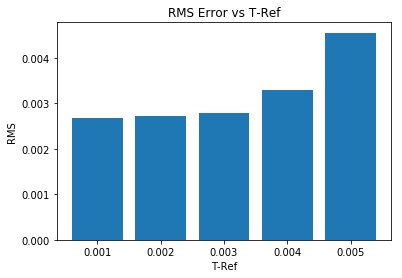

In [4]:
tref_list = [0.001,0.002,0.003,0.004,0.005]
rms_errors = []
np.random.seed(3)
for tref in tref_list:
    model = nengo.Network(label='T-Ref')
    
    with model:
        neurons = nengo.Ensemble(200, dimensions=1, max_rates=Uniform(100,200),
                             neuron_type = nengo.LIFRate(tau_rc=0.02, tau_ref=tref))
        connection = nengo.Connection(neurons, neurons)
    
    simulator = nengo.Simulator(model)
    x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)
    decoders = simulator.data[connection].weights.T
    xhat = np.dot(A, decoders)
    rms_errors.append(np.sqrt(np.average((x-xhat)**2)))

print('\nRMSE with T-Ref :',tref_list,' are ',rms_errors, ' respectively.')

plt.bar(["0.001","0.002","0.003","0.004","0.005"],rms_errors)
plt.title("RMS Error vs T-Ref")
plt.xlabel("T-Ref")
plt.ylabel("RMS")
plt.show();

### Comment

As the T-Ref increases the RMSE increases. The increase in T-Ref means neuron will take more time to fire again. Hence will affect the overall firing rate of the system. This delay possibly will cause representation error, which leads to higher RMSE> 

4. [0.5 marks] What happens to the RMSE and the tuning curves as  𝜏𝑅𝐶  changes between 10-100ms? Show plots. Why?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>


RMSE with T-RC : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  are  [0.0035521568074783805, 0.0025795383224386553, 0.0030533015156442005, 0.002286411165659824, 0.002292847448646186, 0.002523515733205418, 0.0019030983305824692, 0.0017850097309125453, 0.0020057723870649208, 0.0022585714384607625]  respectively.


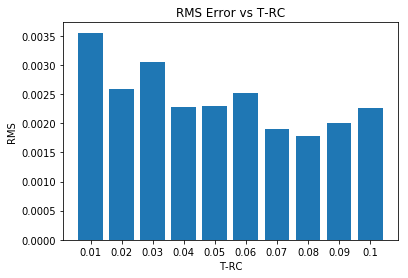

In [5]:
trc_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
rms_errors = []
np.random.seed(0)
for trc in trc_list:
    model = nengo.Network(label='T-RC')
    with model:
        neurons = nengo.Ensemble(200, dimensions=1,max_rates=Uniform(100,200),
                             neuron_type = nengo.LIFRate(tau_rc=trc, tau_ref= 0.002))
        connection = nengo.Connection(neurons, neurons)
    simulator = nengo.Simulator(model)
    x, A = nengo.utils.ensemble.tuning_curves(neurons, simulator)
    decoder = simulator.data[connection].weights.T
    xhat = np.dot(A, decoder)
    rms_errors.append(np.sqrt(np.average((x-xhat)**2)))

    
print('\nRMSE with T-RC :',trc_list,' are ',rms_errors, ' respectively.')

plt.bar(["0.01","0.02","0.03","0.04","0.05","0.06","0.07","0.08","0.09","0.1"],rms_errors)
plt.title("RMS Error vs T-RC")
plt.xlabel("T-RC")
plt.ylabel("RMS")
plt.show();

### Comment

The RMSE is not consistent for different values of T-RC. But the RMSE is higher for low T-RC values. At low values of T-RC, neuron may fire too quickly or better day misfire, which may result in error. On the other hand too T-RC value will affect the whole firing rate as well. Its like, every system has its unique prime T-RC value to perform best and will have lower RMSE.

## 2) Connecting neurons

Make a second ensemble of spiking neurons.  It should have the same parameters as the first ensemble of neurons (from the first question), but have only 50 neurons in it.  Connect the first ensemble to the second such that it computes the identity function, using a post-synaptic time constant of 0.01.  Create an input that is a value of 1 for 0.1<t<0.4 seconds, and otherwise is zero (you can use a lambda function).

1. [1 mark] Show the input value and the decoded values from the two ensembles in three separate plots.  Run the simulation for 0.5 seconds.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

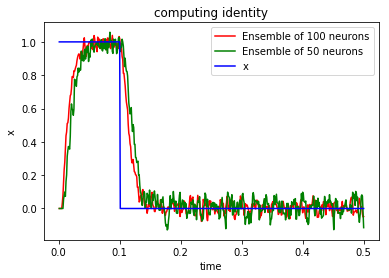

In [6]:
model = nengo.Network(label='connected ensembles')

with model:
    x = nengo.Node(lambda t: 1 if t <= 0.1 else 0)
    neurons_100 = nengo.Ensemble(100, dimensions=1,max_rates=Uniform(100,200))
    neurons_50 = nengo.Ensemble(50, dimensions=1,max_rates=Uniform(100,200))
    
    connection_100 = nengo.Connection(x,neurons_100)
    connection_50 = nengo.Connection(neurons_100, neurons_50)
    
    x_p = nengo.Probe(x)
    neurons_100_p = nengo.Probe(neurons_100, synapse=.01)
    neurons_50_p = nengo.Probe(neurons_50, synapse=.01)

simulator = nengo.Simulator(model)
simulator.run(0.5)

t = simulator.trange()

plt.figure()
plt.title('computing identity')
plt.plot(t, simulator.data[neurons_100_p],'r',label='Ensemble of 100 neurons')
plt.plot(t, simulator.data[neurons_50_p],'g',label='Ensemble of 50 neurons')
plt.plot(t, simulator.data[x_p],'b',label='x')
plt.ylabel("x")
plt.xlabel("time");
plt.legend()

2. [1 mark] Make a new version of the model where instead of computing the identity function, it computes `y=1-2*x`. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

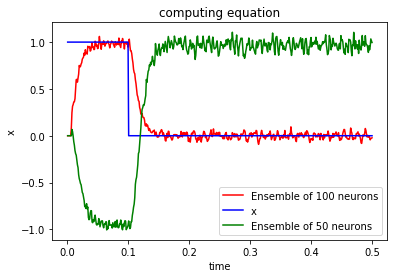

In [7]:
model = nengo.Network(label='Connected Neuron Ensemble')

with model:
    x = nengo.Node(lambda t: 1 if t <= 0.1 else 0)
    neurons_100= nengo.Ensemble(100, dimensions=1, max_rates=Uniform(100,200))
    neurons_50 = nengo.Ensemble(50, dimensions=1, max_rates=Uniform(100,200))
    connection_100 = nengo.Connection(x, neurons_100)
    connection_50 = nengo.Connection(neurons_100, neurons_50, function=lambda x: 1-2*x)
    
    x_p = nengo.Probe(x)
    neurons_100_p = nengo.Probe(neurons_100, synapse=.01)
    neurons_50_p = nengo.Probe(neurons_50, synapse=.01)

simulator = nengo.Simulator(model)
simulator.run(0.5)

t = simulator.trange()
plt.figure()
plt.title('computing equation')
plt.plot(t, simulator.data[neurons_100_p],'r',label='Ensemble of 100 neurons')
plt.plot(t, simulator.data[x_p],'b',label='x')
plt.plot(t, simulator.data[neurons_50_p],'g',label='Ensemble of 50 neurons')
plt.ylabel("x")
plt.xlabel("time");
plt.legend()

## 3) Dynamics

Build a neural integrator.  This consists of one ensemble, one input, a connection from the input to the ensemble, and a connection from the ensemble back to itself.  The ensemble should have 200 neurons and the same parameters as in question 1.  The post-synaptic time constant of the recurrent connection is 0.05, and the post-synaptic time constant of the input is 0.005.  

To be an integrator, the desired dynamical system is ${{dx} \over {dt}} = u$.  To implement this with the NEF, we use the transformation discussed in class, so the feedback connection should compute $f'(x)=x$ and the input connection should compute $g'(x)=\tau u$, where $u$ is the input and $\tau$ is the post-synaptic time constant of the *feedback* connection.  So the feedback connection should compute the identity function and the input connection should compute 0.05 times the input.

For all probes, use a synapse of 0.01.  It can help to explicitly plot the ideal when answering the questions.

1. [1 mark] Show the input and the value represented by the ensemble when the input is a value of 0.9 from t=0.04 to t=1.0 (and 0 for other times).  Run the simulation for 1.5 seconds.  What is the expected ideal result (i.e. if we just mathematically computed the integral of the input, what would we get?)  How does the simulated output compare to that ideal

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

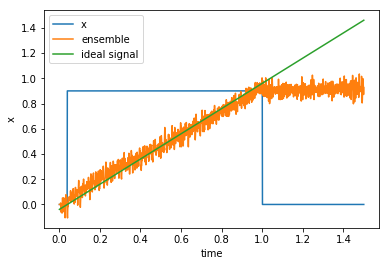

In [8]:
model = nengo.Network('neural integrator')

with model:
    x = nengo.Node(lambda t: 0.9 if t >= 0.04 and t <= 1.0 else 0)
    neurons = nengo.Ensemble(200, dimensions=1,max_rates=Uniform(100,200))
    
    def feedback(x):
        return 1*x
    
    connnection = nengo.Connection(x, neurons, transform=0.05, synapse=0.005)
    connnection = nengo.Connection(neurons, neurons, function=feedback, synapse=0.05)

    x_p = nengo.Probe(x)
    neurons_p = nengo.Probe(neurons, synapse=0.005)
    
simulator = nengo.Simulator(model)
simulator.run(1.5)

plt.plot(simulator.trange(), simulator.data[x_p], label = "x")
plt.plot(simulator.trange(), simulator.data[neurons_p], label = "ensemble")
plt.plot(simulator.trange(), simulator.trange()-0.04, label="ideal signal")
plt.xlabel('time')
plt.ylabel('x')
plt.legend()

### Comment

The expected result of an integrated unit step function is simply the ramp function; therefore a unit step with a cutoff will produce a ramp and then a level-off, as the current value is fed into the feedback loop with no further input. The simulated result actually resembles the mathematical integration fairly closely; however there is a significant amount of noise in the ensemble population.

2. [1 mark] Change the neural simulation to rate mode (use `model.config[nengo.Ensemble].neuron_type = nengo.LIFRate()` which will change all neurons in the simulation to LIF rate neurons).  Re-run the simulation in rate mode.  Show the resulting plots.  How does this compare to the result in part (a)?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

Text(0, 0.5, 'x')

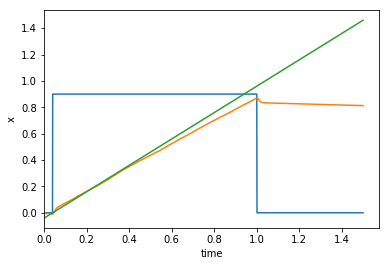

In [9]:
with model:
    neurons.neuron_type=nengo.LIFRate()
    neurons_p = nengo.Probe(neurons, synapse=0.005)
    
simulator = nengo.Simulator(model)
simulator.run(1.5)

plt.plot(simulator.trange(), simulator.data[x_p], label = "x")
plt.plot(simulator.trange(), simulator.data[neurons_p], label = "ensemble")
plt.plot(simulator.trange(), simulator.trange()-0.04, label="ideal signal")
plt.xlabel('time')
plt.xlim(0,)
plt.ylabel('x')

### Comment

This is much cleaner than the LIF model (less noise), and but still has the bump at the end as the ensemble finds a stable steady-state value

The rate LIF neuron seems to have a bit of undershoot as compared to the non-rate neurons. It looks like the previous simulation was slightly better, even though the LIF rate neurons have almost zero noise.

3. [1 mark] Returning to spiking mode, change the input to be a value of 0.9 from t=0.04 to 0.16. Show the same plots as before (the input and the value represented by the ensemble over 1.5 seconds). How does this compare to (a)? Why is it better or worse?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

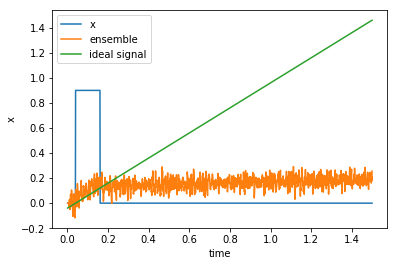

In [10]:
model = nengo.Network('neural integrator')

with model:
    x = nengo.Node(lambda t: 0.9 if t >= 0.04 and t <= 0.16 else 0)
    neurons = nengo.Ensemble(200, dimensions=1,max_rates=Uniform(100,200))
    
    def feedback(x):
        return 1*x
    
    connection = nengo.Connection(x, neurons, transform=0.05, synapse=0.005)
    connection = nengo.Connection(neurons, neurons, function=feedback, synapse=0.05)

    x_p = nengo.Probe(x)
    neurons_p = nengo.Probe(neurons, synapse=0.005)
    
simulator = nengo.Simulator(model)
simulator.run(1.5)

plt.plot(simulator.trange(), simulator.data[x_p], label = "x")
plt.plot(simulator.trange(), simulator.data[neurons_p], label = "ensemble")
plt.plot(simulator.trange(), simulator.trange()-0.04, label="ideal signal")
plt.xlabel('time')
plt.ylabel('x')
plt.legend()

### Comment

This is worse than in part A. Since there is a post-synaptic time constant on the simulus that is now a much larger portion of the signal, the output is less accurate The output also drifts upward instead of stating at a steady-state value.

As compared to part A, this input function is shorter, and so it does not allow for enough buildup of the integrator to reach the full input value. This doesn't seem to be better or worse, as the input is the only thing that has changed, but it does reveal something about the rate at which the model reaches input reference level, which is quite slow.

4. [1 mark] Change the input to a ramp input from 0 to 0.9 from t=0 to t=0.45 (and 0 for t>0.45). Show the same plots as in the previous parts of this question. What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

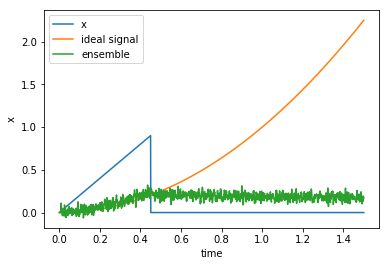

In [11]:
model = nengo.Network('neural integrator')
with model:
    x = nengo.Node(lambda t: 2*t if t <= 0.45 else 0)
    neurons = nengo.Ensemble(200, dimensions=1,max_rates=Uniform(100,200))
    
    def feedback(x):
        return 1*x
    
    connection = nengo.Connection(x, neurons, transform=0.05, synapse=0.005)
    connection = nengo.Connection(neurons, neurons, function=feedback, synapse=0.05)

    x_p = nengo.Probe(x)
    neurons_p = nengo.Probe(neurons, synapse=0.005)
    
simulator = nengo.Simulator(model)
simulator.run(1.5)

plt.plot(simulator.trange(), simulator.data[x_p], label = "x")
plt.plot(simulator.trange(), simulator.trange()**2, label="ideal signal")
plt.plot(simulator.trange(), simulator.data[neurons_p], label = "ensemble")
plt.xlabel('time')
plt.ylabel('x')
plt.legend()

### Comment
This ensemble ends up representing a quadratic, with the ideal equation being $x=t^2$

The ensemble ends up representing a sort of quadratic curve, and then levels off, which is exactly the expected behaviour. The integral of a ramp is a quadratic. If the ramp ends, the integrator should continue at the last value. In the simulated models there is a bit of drop-off after the ramp input ends.

5. [1 mark] Change the input to `5*sin(5*t)`. What should the value represented by the ensemble be (write the equation)? How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

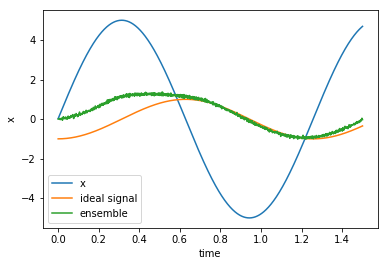

In [12]:
model = nengo.Network('Neural Integrator with LIF Rate Neurons')

with model:
    x = nengo.Node(lambda t: 5*np.sin(5*t))
    neurons = nengo.Ensemble(200, dimensions=1,max_rates=Uniform(100,200))
    
    def feedback(x):
        return 1*x
    
    connection = nengo.Connection(x, neurons, transform=0.05, synapse=0.005)
    connection = nengo.Connection(neurons, neurons, function=feedback, synapse=0.05)

    x_p = nengo.Probe(x)
    neurons_p = nengo.Probe(neurons, synapse=0.005)
    
simulator = nengo.Simulator(model)
simulator.run(1.5)

plt.plot(simulator.trange(), simulator.data[x_p], label = "x")
plt.plot(simulator.trange(), -np.cos(5*simulator.trange()), label="ideal signal")
plt.plot(simulator.trange(), simulator.data[neurons_p], label = "ensemble")
plt.xlabel('time')
plt.ylabel('x')
plt.legend()

### Comment

The value represented by the ensemble should be $-cos(5t)$, and apprximates it fairly well. It's failings are in the beginning since the input function starts at t=0, and has no past values, whereas the proper integral of $5sin(5t)$ assumes a function starting at $-\infty$

The integral of 5sin(5t) is -cos(5t). The simulation approximates this relatively well in that the amplitude is correct, and the period is the same as the input. The beginning of the approximation should begin at a negative value; however since the integrator has no past information, and only adds, it cannot approximate the true integral at the beginning of the input, and thus starts at zero. It is due to this that it is slightly out of phase with the input, and so it is not represented properly.